In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Classificação

#### 1. Aquisição dos dados

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

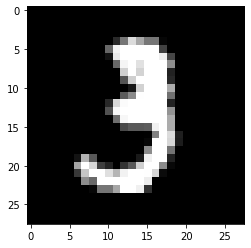

In [5]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [15]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

In [17]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [7]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [8]:
x_treino.shape

(48000, 28, 28)

In [10]:
28 * 28

784

In [18]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 784))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

### 5. Definir otimizadores

In [19]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [20]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 100, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8759 - val_loss: 0.2546 - val_accuracy: 0.9234
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2067 - accuracy: 0.9395 - val_loss: 0.2057 - val_accuracy: 0.9402
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1682 - accuracy: 0.9493 - val_loss: 0.1889 - val_accuracy: 0.9462
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1444 - accuracy: 0.9562 - val_loss: 0.1651 - val_accuracy: 0.9512
Epoch 5/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9605 - val_loss: 0.1709 - val_accuracy: 0.9512
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.1526 - val_accuracy: 0.9563
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1043 - accuracy: 0.9680 - val_loss: 0.1615 - val_ac

##### 7. Avaliação do modelo

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.9613

In [24]:
y_test.argmax(1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [28]:
pred_simples.argmax(1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
pred_simples[0]

array([2.3222662e-32, 6.3953097e-21, 1.5786006e-12, 6.9616120e-14,
       1.3827852e-24, 4.7833543e-18, 0.0000000e+00, 1.0000000e+00,
       1.5175813e-23, 1.7658272e-14], dtype=float32)

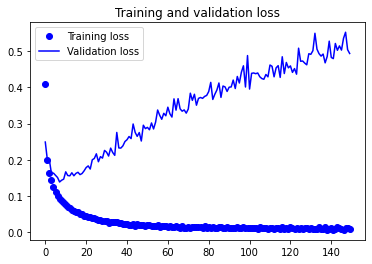

In [53]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [12]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4145 - accuracy: 0.8777 - val_loss: 0.2230 - val_accuracy: 0.9359
Epoch 2/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1906 - accuracy: 0.9456 - val_loss: 0.1823 - val_accuracy: 0.9481
Epoch 3/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1539 - accuracy: 0.9554 - val_loss: 0.1700 - val_accuracy: 0.9500
Epoch 4/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1345 - accuracy: 0.9602 - val_loss: 0.1537 - val_accuracy: 0.9541
Epoch 5/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1186 - accuracy: 0.9641 - val_loss: 0.1445 - val_accuracy: 0.9583
Epoch 6/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1072 - accuracy: 0.9669 - val_loss: 0.1544 - val_accuracy: 0.9565
Epoch 7/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0971 - accuracy: 0.9702 - val_loss: 0.1535 - val_ac

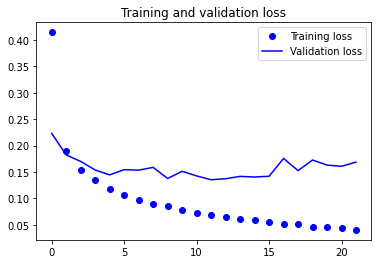

In [13]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

0.9656

In [18]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 956,    0,    1,    1,    3,    4,    4,    3,    3,    5],
       [   0, 1125,    1,    3,    0,    1,    4,    0,    1,    0],
       [   3,    3,  989,    9,    8,    1,    1,   10,    8,    0],
       [   0,    3,    7,  967,    0,   12,    0,    6,    5,   10],
       [   2,    0,    0,    1,  958,    1,    6,    0,    2,   12],
       [   3,    1,    0,   12,    1,  851,    6,    4,    5,    9],
       [   3,    4,    1,    1,    5,   11,  931,    0,    2,    0],
       [   0,    5,    9,    2,    4,    0,    0,  998,    0,   10],
       [   3,    4,    3,    7,    9,    9,    5,    5,  909,   20],
       [   3,    3,    0,    0,   16,    5,    0,    6,    4,  972]],
      dtype=int64)

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [25]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [26]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 3s 1ms/step - loss: 0.8188 - accuracy: 0.7358 - val_loss: 0.3064 - val_accuracy: 0.9117
Epoch 2/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4956 - accuracy: 0.8546 - val_loss: 0.2409 - val_accuracy: 0.9293
Epoch 3/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4436 - accuracy: 0.8718 - val_loss: 0.2294 - val_accuracy: 0.9330
Epoch 4/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4134 - accuracy: 0.8780 - val_loss: 0.2213 - val_accuracy: 0.9347
Epoch 5/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3936 - accuracy: 0.8850 - val_loss: 0.2091 - val_accuracy: 0.9392
Epoch 6/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8894 - val_loss: 0.2096 - val_accuracy: 0.9387
Epoch 7/150
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3725 - accuracy: 0.8913 - val_loss: 0.2041 - val_ac

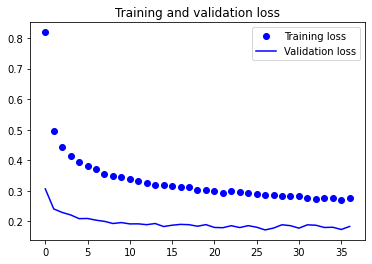

In [27]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

0.9519

In [29]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 964,    0,    0,    1,    0,    4,    4,    5,    2,    0],
       [   0, 1113,    4,    1,    1,    1,    3,    1,    9,    2],
       [   5,    5,  973,    8,    4,    1,    8,   15,   12,    1],
       [   3,    4,   10,  936,    0,   36,    0,   11,    7,    3],
       [   1,    0,    2,    0,  944,    0,   14,    6,    2,   13],
       [   6,    3,    1,    9,    3,  839,   12,    2,   10,    7],
       [   9,    2,    1,    0,    5,    7,  932,    0,    2,    0],
       [   0,    7,    9,    4,    1,    0,    0,  995,    0,   12],
       [  16,   12,    1,    6,    7,   16,    9,   10,  891,    6],
       [   2,    7,    0,    7,   33,   16,    1,    9,    2,  932]],
      dtype=int64)

# Regressão

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [ ]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150


6/6 [==============================] - 1s 48ms/step - loss: 566.7054 - mae: 22.0761 - val_loss: 493.4975 - val_mae: 20.0933
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 512.3425 - mae: 20.9262 - val_loss: 447.1916 - val_mae: 18.9710
Epoch 3/150
6/6 [==============================] - 0s 9ms/step - loss: 463.2422 - mae: 19.8024 - val_loss: 405.4670 - val_mae: 17.8868
Epoch 4/150
6/6 [==============================] - 0s 9ms/step - loss: 416.3006 - mae: 18.6654 - val_loss: 356.1069 - val_mae: 16.5545
Epoch 5/150
6/6 [==============================] - 0s 10ms/step - loss: 362.0445 - mae: 17.3027 - val_loss: 310.2535 - val_mae: 15.2239
Epoch 6/150
6/6 [==============================] - 0s 9ms/step - loss: 311.0588 - mae: 15.8696 - val_loss: 267.9813 - val_mae: 13.9418
Epoch 7/150
6/6 [==============================] - 0s 9ms/step - loss: 264.2944 - mae: 14.4725 - val_loss: 229.8788 - val_mae: 12.7672
Epoch 8/150
6/6 [==============================] - 0s 10ms/step -

In [ ]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred_simples)

3.211255595263313

In [ ]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = pred_simples

resultado

,y_test,y_pred
0,7.2,7.012816
1,18.8,17.909698
2,19.0,20.573135
3,27.0,31.341089
4,22.2,24.925478
...,...,...
97,21.9,54.880924
98,24.1,25.952681
99,50.0,47.812099
100,26.7,33.146236
